# Đồ Án Cuối Kỳ Môn Lập Trình Cho Khoa Học Dữ Liệu

## Thông tin nhóm:
1. Nguyễn Tấn Thìn - 18120085
1. Phạm Nguyên Minh Thy - 18120090

## Nội dung file notebook:
1. Thu thập dữ liệu
2. Khám phá dữ liệu và tiền xử lý (nếu có)
3. Đưa ra câu hỏi
4. Tiền xử lý, phân tích và trả lời câu hỏi
5. Nhìn lại quá trình làm đồ án

## 1. Thu thập dữ liệu

Trong đồ án này nhóm em sử dụng dữ liệu đã được thu thập sẵn `Levels_Fyi_Salary_Data.csv` chia sẻ trên Kaggle ([nguồn](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries)). Đây là tập dữ liệu chứa hơn 62000 hồ sơ lương từ các công ty công nghệ hàng đầu, chứa các thông tin như vị trí công việc, mức lương, tên công ty, năm kinh nghiệm,... Dữ liệu này được Jack Ogozaly (người đăng tập dữ liệu lên Kaggle) lấy từ trang [levels.fyi](https://www.levels.fyi/) và tiến hành làm sạch. Theo nhóm em tìm hiểu được thì tác giả dùng thư viện request của python để lấy dữ liệu từ trang levels.fyi về dưới dạng json. Sau đó thay thế các giá trị rỗng bằng NaN, chuyển các cột số dạng object về int hoặc float.

## 2. Khám phá dữ liệu và tiền xử lý (nếu có)

### Import các thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_colwidth', 100)

### Đọc dữ liệu và đổi tên một số cột
Phần lớn tên các cột ở dạng viết thường và viết liền, vài cột cuối có dạng viết hoa chữ cái đầu từ và cách nhau bằng gạch dưới nên ta tiến hành đổi tên vài cột cuối cho đồng nhất.

In [2]:
salary_df = pd.read_csv('./Data/Levels_Fyi_Salary_Data.csv')
salary_df.rename(lambda col: str(col).lower().replace('_', ''), axis="columns", inplace=True)
salary_df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,doctoratedegree,highschool,somecollege,raceasian,racewhite,racetwoormore,raceblack,racehispanic,race,education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,NaN,NaN


Các cột sau khi được đổi tên

In [3]:
salary_df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rownumber', 'mastersdegree', 'bachelorsdegree', 'doctoratedegree',
       'highschool', 'somecollege', 'raceasian', 'racewhite', 'racetwoormore',
       'raceblack', 'racehispanic', 'race', 'education'],
      dtype='object')

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
num_rows, num_cols = salary_df.shape
num_rows, num_cols

(62642, 29)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
Theo mô tả trên kaggle thì mỗi dòng là hồ sơ lương của một người tại một công ty. Các dòng đều mang ý nghĩa giống nhau

### Dữ liệu có các dòng bị lặp không?

In [5]:
has_duplicate = salary_df.duplicated().sum() > 0
has_duplicate

False

### Mỗi cột có ý nghĩa gì

Dữ liệu này chứa rất nhiều cột. Ý nghĩa một số cột trong file `Levels_Fyi_Salary_Data.csv` được giải thích trong bảng sau:

|Cột|Ý nghĩa|
|---|---|
|**timestamp**|Ngày giờ (%m/%d/%Y %H:%M) ghi nhận thông tin| 
|**company**|Tên công ty làm việc|
|**level**|Trình độ của công việc|
|**title**|Chức vụ hay vị trí công việc|
|**totalyyearlycompensation**|Tổng thu nhập hằng năm có thể bao gồm lương, tiền hỗ trợ, thưởng, bảo hiểm, du lịch ...|
|**location**|Địa điểm làm việc|
|**yearofexperience**|Số năm kinh nghiệm|
|**yearsatcompany**|Số năm làm việc ở công ty|
|**tag**|Phân loại công việc|
|**basesalary**|Lương cơ bản|
|**stockgrantvalue**|Giá trị thưởng bằng cổ phiếu|
|**bonus**|Tiền thưởng|
|**gender**|Giới tính|
|**otherdetails**|Mô tả thêm về vị trí công việc|
|**cityid**|Mã thành phố|
|**dmaid**| Mã DMA (Designated Market Area) là vùng mà dân cư trong vùng đó nhận cùng chương trình truyền hình hoặc phát thanh|
|**mastersdegree**|Có bằng thạc sĩ hay không|
|**doctoratedegree**|Có bằng tiến sĩ hay không|
|**highschool**|Có học trung học hay không|
|**somecollege**|Có học ở trường cao đẳng hay không|
|**race**|Dân tộc, chủng tộc|
|**education**|Trình độ văn hoá|

### Có cột nào dư thừa hay không cần thiết không?

Tiến hành loại bỏ các cột `cityid, dmaid, rownumber, raceasian, racewhite, racetwoormore, raceblack, racehispanic, level`.
- Cột `cityid`, `dmaid` là các mã địa điểm, không mang lại nhiều ý nghĩa
- Cột `rownumber` đếm thứ tự dòng, không mang lại nhiều ý nghĩa
- Nhận thấy rằng các cột `raceasian, racewhite, racetwoormore, raceblack, racehispanic` là không cần thiết vì đã có cột `race` thống kê lại các giá trị cho race rồi.
- Cột `level` cũng có khá nhiều giá trị khác nhau do mỗi công ty sẽ có kí hiệu riêng cho các level. Để đánh giá chung cho các công ty thì có thể dùng cột `title`.

In [6]:
drop_cols = ["cityid", "dmaid", 'rownumber', "raceasian", "racewhite", "racetwoormore", "raceblack", "racehispanic", "level"]
salary_df.drop(drop_cols, axis=1, inplace=True)
salary_df.head()

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,mastersdegree,bachelorsdegree,doctoratedegree,highschool,somecollege,race,education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
salary_df.dtypes

timestamp                   object
company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
mastersdegree                int64
bachelorsdegree              int64
doctoratedegree              int64
highschool                   int64
somecollege                  int64
race                        object
education                   object
dtype: object

**Nhận xét:** Ở đây, phần lớn các cột đều ở đúng định dạng, cả chỉ có cột "timestamp" cần chuyển từ object về "datetime" để tiện cho khám phá sau này

### Tiền xử lý 
Chuyển cột "timestamp" sang kiểu dữ liệu datetime

In [8]:
# salary_df['timestamp'] 
salary_df['timestamp'] = pd.to_datetime(salary_df['timestamp'], format='%m/%d/%Y %H:%M:%S')
salary_df.dtypes

timestamp                  datetime64[ns]
company                            object
title                              object
totalyearlycompensation             int64
location                           object
yearsofexperience                 float64
yearsatcompany                    float64
tag                                object
basesalary                        float64
stockgrantvalue                   float64
bonus                             float64
gender                             object
otherdetails                       object
mastersdegree                       int64
bachelorsdegree                     int64
doctoratedegree                     int64
highschool                          int64
somecollege                         int64
race                               object
education                          object
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Các cột có kiểu dữ liệu dạng số gồm: "timestamp", "totalyearlycompensation", "yearsofexperience", "yearsatcompany", "basesalary", "stockgrantvalue", "bonus".

In [9]:
def missing_ratio(s):
    return s.isna().mean() * 100

def lower_quantile(s):
    return s.quantile(0.25)

def upper_quantile(s):
    return s.quantile(0.75)

def percentile_5(s):
    return s.quantile(0.05)

def percentile_95(s):
    return s.quantile(0.95)

numeric_cols = ["timestamp", "totalyearlycompensation", "yearsofexperience", "yearsatcompany", "basesalary", "stockgrantvalue", "bonus"]
nume_col_profiles_df = salary_df[numeric_cols]\
    .agg([missing_ratio, pd.Series.mean, pd.Series.std, pd.Series.min, percentile_5, lower_quantile, pd.Series.median, upper_quantile, percentile_95, pd.Series.max])
nume_col_profiles_df.T

,missing_ratio,mean,std,min,percentile_5,lower_quantile,median,upper_quantile,percentile_95,max
timestamp,0.0,2020-07-17 03:30:08.313814784,307 days 01:41:17.797452992,2017-06-07 11:33:27,2018-11-02 17:20:13.900000,2020-01-11 23:12:55.500000,2020-09-21 16:31:21,2021-03-26 15:19:06.500000,2021-07-23 01:08:23.349999872,2021-08-17 08:28:57
totalyearlycompensation,0.0,216300.373647,138033.746377,10000.0,65000.0,135000.0,188000.0,264000.0,457950.0,4980000.0
yearsofexperience,0.0,7.204135,5.840375,0.0,0.0,3.0,6.0,10.0,20.0,69.0
yearsatcompany,0.0,2.702093,3.263656,0.0,0.0,0.0,2.0,4.0,9.0,69.0
basesalary,0.0,136687.281297,61369.278057,0.0,23000.0,108000.0,140000.0,170000.0,222950.0,1659870.0
stockgrantvalue,0.0,51486.080733,81874.569391,0.0,0.0,0.0,25000.0,65000.0,200000.0,2800000.0
bonus,0.0,19334.746588,26781.29204,0.0,0.0,1000.0,14000.0,26000.0,60000.0,1000000.0


### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Các cột có kiểu dữ liệu dạng phân loại gồm: "company", "level", "title", "location", "tag", "gender", "otherdetails", "cityid", "dmaid", "rownumber", "mastersdegree", "bachelorsdegree", "doctoratedegree", "highschool", "somecollege", "raceasian", "racewhite", "racetwoormore", "raceblack", "racehispanic", "race", "education"

In [10]:
def num_diff_vals(s):
    return s.nunique()

def diff_vals(s):
    return s.dropna().unique()

def diff_vals_count(s):
    return s.value_counts().to_dict()

# cate_cols = ["company", "level", "title", "location", "tag", "gender", "otherdetails", "cityid", 
#              "dmaid", "rownumber", "mastersdegree", "bachelorsdegree", "doctoratedegree", "highschool",
#              "somecollege", "raceasian", "racewhite", "racetwoormore", "raceblack", "racehispanic", "race", "education"]
cate_cols = ["company", "title", "location", "tag", "gender", "otherdetails",
             "mastersdegree", "bachelorsdegree", "doctoratedegree", "highschool", "somecollege", "race", "education"]
cate_col_profiles_df = salary_df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals, diff_vals_count])
cate_col_profiles_df.T

,missing_ratio,num_diff_vals,diff_vals,diff_vals_count
company,0.007982,1631,"[Oracle, eBay, Amazon, Apple, Microsoft, Salesforce, Facebook, Uber, Oath, Google, Netflix, Pint...","{'Amazon': 8126, 'Microsoft': 5216, 'Google': 4330, 'Facebook': 2990, 'Apple': 2028, 'Oracle': 1..."
title,0.0,15,"[Product Manager, Software Engineer, Software Engineering Manager, Data Scientist, Solution Arch...","{'Software Engineer': 41231, 'Product Manager': 4673, 'Software Engineering Manager': 3569, 'Dat..."
location,0.0,1050,"[Redwood City, CA, San Francisco, CA, Seattle, WA, Sunnyvale, CA, Mountain View, CA, Redmond, WA...","{'Seattle, WA': 8701, 'San Francisco, CA': 6797, 'New York, NY': 4562, 'Redmond, WA': 2649, 'Mou..."
tag,1.363303,3058,"[Full Stack, Distributed Systems (Back-End), Embedded Systems, API Development (Back-End), DevOp...","{'Full Stack': 11382, 'Distributed Systems (Back-End)': 10838, 'API Development (Back-End)': 627..."
gender,31.193129,4,"[Male, Female, Other, Title: Senior Software Engineer]","{'Male': 35702, 'Female': 6999, 'Other': 400, 'Title: Senior Software Engineer': 1}"
otherdetails,35.926375,12841,"[Tons of overtime, PhD, How do I access results?, Year 2 bonus, 24k, 401k match 50%, vested imme...","{'Masters': 3983, 'Title: Software Engineer': 1453, 'Race: Asian, Academic Level: Master’s degre..."
mastersdegree,0.0,2,"[0, 1]","{0: 47251, 1: 15391}"
bachelorsdegree,0.0,2,"[0, 1]","{0: 50037, 1: 12605}"
doctoratedegree,0.0,2,"[0, 1]","{0: 60839, 1: 1803}"
highschool,0.0,2,"[0, 1]","{0: 62322, 1: 320}"


### Có dòng nào mang giá trị bất thường không

Quan sát thấy cột gender có mang giá trị kì lạ là 'Title: Senior Software Engineer' 

In [11]:
salary_df[salary_df.gender=='Title: Senior Software Engineer'][['timestamp', 'company', 'title', 'gender', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany']]

,timestamp,company,title,gender,totalyearlycompensation,yearsofexperience,yearsatcompany
11010,2019-09-17 06:23:02,GitHub,Software Engineer,Title: Senior Software Engineer,205000,15.0,4.0


Có thể đây là nhầm lẫn lúc nhập dữ liệu lên trang web. Tiến hành xoá dòng này ra khỏi dataframe

In [12]:
salary_df.drop(index=11010, inplace=True)

##  3. Đưa ra câu hỏi

Nhóm đặt ra 4 câu hỏi cần trả lời:
1. Những công việc có thu nhập cao thường tập trung ở những công ty nào?
2. Xu hướng tuyển dụng vị trí Data Scientist thay đổi như thế nào?
3. 
4. Bằng PhD có giá trị mang lại thu nhập cao ở mọi vị trí hay không?

## 5. Nhìn lại quá trình làm đồ án

### Tiền xử lý

Thêm cột `year`, `month` và `yearmonth` chứa thông tin năm, tháng dạng yyyy/mm vào dataframe để thuận tiện cho các phân tích và vẽ biểu đồ biến đổi theo thời gian sau này

In [13]:
salary_df = salary_df.sort_values('timestamp')
salary_df['year'] = salary_df['timestamp'].dt.year
salary_df['month'] = salary_df['timestamp'].dt.month
salary_df['yearmonth'] = salary_df['timestamp'].dt.to_period('M')

### Định nghĩa một số hàm cần thiết

Hàm vẽ biểu đồ tròn

In [14]:
# Hàm vẽ biểu đồ tròn
def plot_pie_chart(data, label, plot_title, legend_title, explode=None, cmap='Spectral', figsize=(9, 6), random_num=2):
    cmap = plt.get_cmap(cmap)
    colors = [cmap(i) for i in np.linspace(0, 1, len(label)+random_num)]

    fig, ax = plt.subplots(figsize=figsize)
    wedges, texts, autotexts = ax.pie(
        data, labels=label, autopct='%1.1f%%', shadow=False,
        startangle=0, colors=colors, textprops=dict(color="w"), explode=explode)

    ax.legend(wedges, label,
        title=legend_title,
        loc="center left",
        facecolor='white',
        bbox_to_anchor=(1, 0, 0.5, 1))

    ax.axis('equal')
    plt.setp(autotexts, size=12, weight="bold", color='white')
    plt.title(plot_title, fontsize=18, pad=25)
    plt.tight_layout()
    plt.show()

### 4.1. Những công việc có thu nhập cao thường tập trung ở những công ty và vị trí công việc nào?

Thu nhập là điều mà nhiều người ứng tuyển quan tâm. Mỗi công ty đều có mức trả lương khác nhau tuỳ thuộc vào độ lớn mạnh của công ty. Trả lời được câu hỏi này giúp người quan tâm ứng tuyển có thêm thông tin như những công ty top đầu gồm những công ty nào, số lượng các công việc lương cao ở các công ty lớn đó có nhiều không, những vị trí nào thường có mức lương cao.

Để trả lời câu hỏi này, nhóm tiếp cận theo các bước:
- **Bước 1:** Chọn ngưỡng và lọc ra các công việc (dòng) có thu nhập cao
- **Bước 2:** Gom nhóm theo `company` và đếm số công việc (dòng). Vẽ biểu đồ trực quan
- **Bước 3:** Gom nhóm theo `title` và đếm số công việc (dòng). Vẽ biểu đồ trực quan

#### **Bước 1:** Chọn ngưỡng và lọc ra các công việc (dòng) có thu nhập cao

Nhóm chọn mức phân vị 75% làm ngưỡng (threshold) để lọc ra các công việc có thu nhập cao

In [15]:
threshold = salary_df['totalyearlycompensation'].quantile(0.75)
df_filtered = salary_df[salary_df['totalyearlycompensation'] >= threshold]

#### **Bước 2:** Gom nhóm theo `company` và đếm số công việc (dòng). Vẽ biểu đồ trực quan

Gom nhóm theo `company`, đếm số lượng dòng và sắp xếp giảm dần theo số lượng. Chọn ra 10 công ty đứng đầu

In [16]:
# df = df.groupby(['company', 'title']).size()
# df.unstack()
df = df_filtered.groupby('company').size().sort_values(ascending=False)
top_company = df.index.values[:10]
df.head(10)

company
Amazon        2093
Google        1994
Facebook      1760
Microsoft      944
Apple          936
Uber           465
Salesforce     413
LinkedIn       368
Oracle         269
Netflix        255
dtype: int64

Vẽ biểu đồ trực quan kết quả

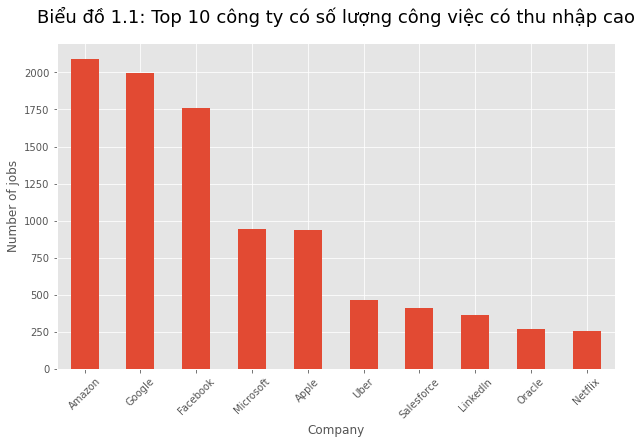

In [17]:
df.iloc[:10].plot.bar(figsize=(10, 6))
plt.xlabel('Company')
plt.ylabel('Number of jobs')
plt.xticks(rotation=45)
plt.title('Biểu đồ 1.1: Top 10 công ty có số lượng công việc có thu nhập cao', fontsize=18, pad=20);

Từ biểu đồ ta có nhận xét:
- Kết quả này không quá bất ngờ, những ông lớn của công nghệ thì luôn có những công việc lương cao.
- Trong biểu đồ 1.1 ta có thể thấy 10 công ty phân thành 3 nhóm: nhóm cao nhất là Amazon, Google, Facebook; nhóm ở giữa là Microsoft, Apple; nhóm còn lại thấp hơn là Uber, Linkedin, ...

#### **Bước 3:** Gom nhóm theo `title` và đếm số công việc (dòng). Vẽ biểu đồ trực quan

In [18]:
df = df_filtered.groupby('title').size().sort_values(ascending=False)
top_title = df.index.values[:5]
df.head(5)

title
Software Engineer               9152
Software Engineering Manager    2242
Product Manager                 1622
Hardware Engineer                541
Data Scientist                   536
dtype: int64

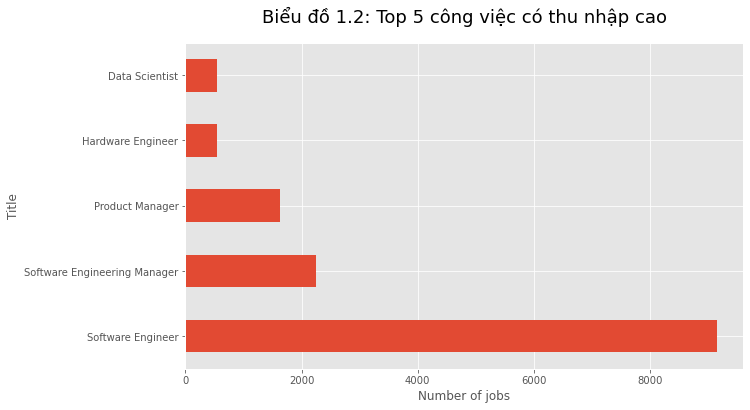

In [19]:
df.iloc[:5].plot.barh(figsize=(10, 6))
plt.xlabel('Number of jobs')
plt.ylabel('Title')
# plt.xticks(rotation=45)
plt.title('Biểu đồ 1.2: Top 5 công việc có thu nhập cao', fontsize=18, pad=20);

**Tổng kết câu hỏi:** Ta rút ra được một số nhận xét:
- Những công việc lương cao thì thường của những công ty công nghệ lớn như Amazon, Google, Facebook, ...
- Software Engineer (SE) lương cao có số lượng vượt trội hơn hẳn các vị trí khác. Điều này cũng dễ hiểu ở một tập dữ liệu về công nghệ. 
- Số lượng Software Engineering Manager lương cao ít hơn SE nhiều, tuy nhiên vì họ là những người quản lí nên số lượng ít hơn là dễ hiểu, nhưng lương họ thì thường không ít :D

### 4.2. Xu hướng tuyển dụng vị trí Data Scientist thay đổi như thế nào?

Trả lời được câu hỏi này sẽ giúp hiểu hơn về tình hình tuyển dụng Data Scientist ở nhiều khía cạnh, một công việc trong thời gian gần đây trở nên rất hot và được Harvard gọi là "The Sexiest Job of the 21st Century"

Để trả lời câu hỏi này, nhóm xem xét việc tuyển dụng Data Scientist dưới các góc nhìn:
- **Bước 1:** Thu nhập trung bình thay đổi như thế nào
- **Bước 2:** Số lượng tuyển dụng theo số năm kinh nghiệm thay đổi như thế nào
- **Bước 3:** Thu nhập theo số năm kinh nghiệm thay đổi như thế nào
- **Bước 4**: Số lượng tuyển dụng theo bằng cấp thay đổi như thế nào
- **Bước 5:** Thu nhập theo bằng cấp thay đổi như thế nào

Dữ liệu được thu thập từ tháng 06/2017 đến tháng 08/2021 nên các phân tích theo thời gian chỉ giới hạn trong phạm vi thời gian này

#### **Bước 1:** Thu nhập trung bình thay đổi như thế nào

Đầu tiên, lọc ra các vị trí Data Scientist và lưu vào df_ds để dùng cho các phân tích của câu này

In [20]:
df_ds = salary_df[salary_df['title']=='Data Scientist']
print(f"Có {df_ds.shape[0]} dòng thuộc vị trí công việc Data Scientist")
print(f"Dữ liệu về Data Scientist được thu thập từ {df_ds['yearmonth'].min()} đến {df_ds['yearmonth'].max()}")

Có 2578 dòng thuộc vị trí công việc Data Scientist
Dữ liệu về Data Scientist được thu thập từ 2018-06 đến 2021-08


Gom nhóm theo `yearmonth`, tính thu nhập trung bình theo từng khoảng thời gian

In [21]:
df = df_ds.groupby('yearmonth')[['totalyearlycompensation']].mean()
df.head()

,totalyearlycompensation
yearmonth,
2018-06,332928.571429
2018-07,205000.000000
2018-08,215800.000000
2018-09,242714.285714
2018-10,211147.058824


Vẽ biểu đồ đường để có cái nhìn trực quan

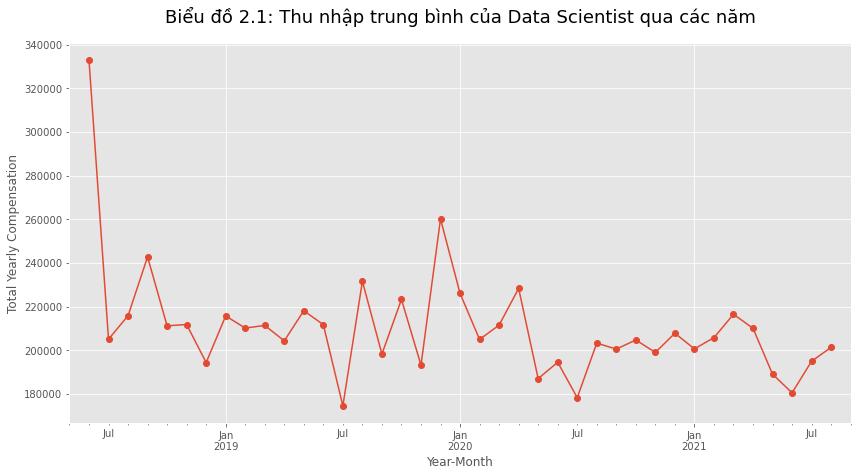

In [22]:
df['totalyearlycompensation'].plot.line(marker='o', figsize=(14, 7))
plt.xlabel('Year-Month')
plt.ylabel('Total Yearly Compensation')
plt.xlim([df_ds['yearmonth'].min() - 1, df_ds['yearmonth'].max() + 1])
plt.title('Biểu đồ 2.1: Thu nhập trung bình của Data Scientist qua các năm', fontsize=18, pad=20);

Từ biểu đồ ta rút ra một số nhận xét:
- Ở điểm bắt đầu tháng 06/2018, giá trị thu nhập cao vọt bất thường
- Ở các giai đoạn tiếp theo thì nhìn chung thu nhập cũng giao động lên xuống khá nhiều, có một số đáy nổi bật vào tháng 07/2019, tháng 07/2020 và tháng 06/2021, đỉnh nổi bật vào tháng 12/2019

#### **Bước 2:** Số lượng tuyển dụng theo số năm kinh nghiệm thay đổi như thế nào

Đầu tiên vẽ biểu đồ boxplot để xem phân bố số năm kinh nghiệm như thế nào

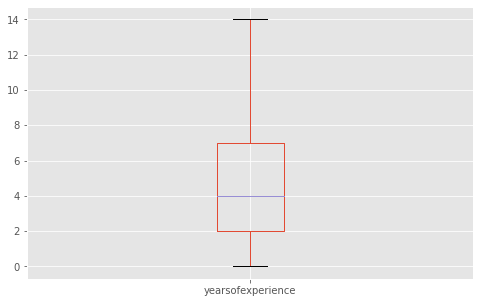

In [23]:
df_ds.yearsofexperience.plot.box(figsize=(8, 5), showfliers=False);

Viết hàm để phân loại số năm kinh nghiệm thành các loại low, medium và high với 2 ngưỡng chọn là `threshold1 = 2` và `threshold2 = 5`

In [24]:
def classify_experience(year, threshold1=2, threshold2=5):
    if year <= threshold1:
        return 'low'
    elif year > threshold1 and year <= threshold2:
        return 'medium'
    else:
        return 'high'

Tạo cột `experience` mang giá trị phân loại năm kinh nghiệm, sau đó gom nhóm theo mốc thời gian và đếm số lượng

In [25]:
df_experience = df_ds.copy()
# df = df.sort_values('timestamp')
df_experience['experience'] = df_experience['yearsofexperience'].apply(lambda r: classify_experience(r))
df = df_experience.groupby(['yearmonth', 'experience']).size()
df = df.unstack(1)
df = df.fillna(0)
df.head()

experience,high,low,medium
yearmonth,,,
2018-06,7.0,2.0,5.0
2018-07,2.0,0.0,0.0
2018-08,7.0,4.0,4.0
2018-09,9.0,9.0,3.0
2018-10,13.0,12.0,9.0


Vẽ biểu đồ đường để có cái nhìn trực quan

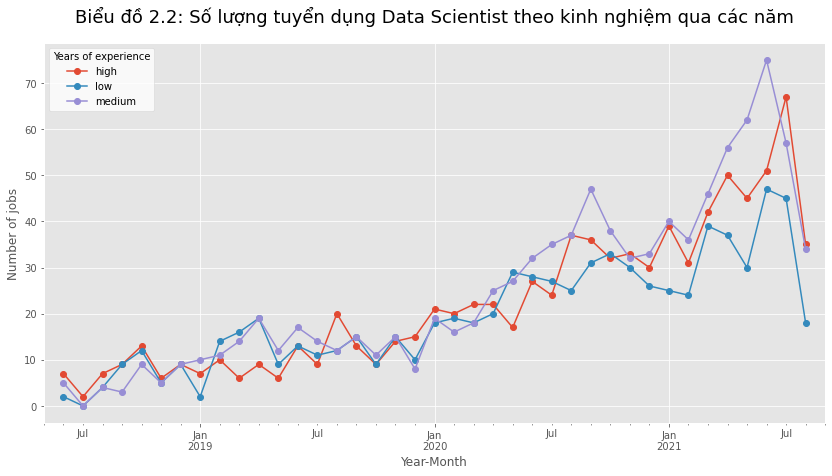

In [26]:
df.plot.line(marker='o', figsize=(14, 7))
plt.xlabel('Year-Month')
plt.ylabel('Number of jobs')
plt.legend(facecolor='white', title='Years of experience')
plt.xlim([df_ds['yearmonth'].min() - 1, df_ds['yearmonth'].max() + 1])
plt.title('Biểu đồ 2.2: Số lượng tuyển dụng Data Scientist theo kinh nghiệm qua các năm', fontsize=18, pad=20);

Từ biểu đồ ta rút ra một số nhận xét:
- Về tổng quan thì số lượng tuyển Data Scientist tăng dần theo thời gian
- Càng về sau khoảng từ đầu 2021 thì số lượng tuyển ở mỗi nhóm năm kinh nghiệm mới có sự tách ra rõ ràng hơn
- Nhìn chung thì số lượng tuyển thường năm trong khoảng từ 2-5 năm kinh nghiệm

#### **Bước 3:** Thu nhập theo số năm kinh nghiệm thay đổi như thế nào

In [27]:
df = df_experience.groupby(['yearmonth', 'experience'])[['totalyearlycompensation']].mean()
df = df.unstack(1)
# df = df.fillna(0)
df.columns = df.columns.droplevel(0)
df.head()

experience,high,low,medium
yearmonth,,,
2018-06,378714.285714,145000.000000,344000.000000
2018-07,205000.000000,NaN,NaN
2018-08,245714.285714,180500.000000,198750.000000
2018-09,273777.777778,207555.555556,255000.000000
2018-10,247384.615385,177916.666667,203111.111111


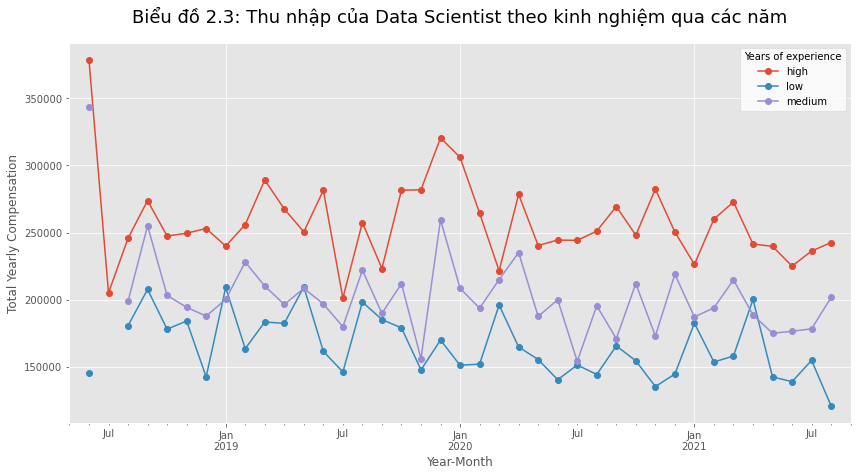

In [28]:
df.plot.line(marker='o', figsize=(14, 7))
plt.xlabel('Year-Month')
plt.ylabel('Total Yearly Compensation')
plt.legend(facecolor='white', title='Years of experience')
plt.xlim([df.index.min() - 1, df.index.max() + 1])
plt.title('Biểu đồ 2.3: Thu nhập của Data Scientist theo kinh nghiệm qua các năm', fontsize=18, pad=20);

Kết quả của biểu đồ cũng khá dễ hiểu, những người có số năm kinh nghiệm cao thì thu nhập sẽ cao hơn. Tuy nhiên với số năm kinh nghiệm trên 5 năm (nhóm high) thì mức lương sẽ khá tách biệt với nhóm dưới. Còn ở nhóm low, medium thì có đôi lúc giao nhau

#### **Bước 4**: Số lượng tuyển dụng theo bằng cấp thay đổi như thế nào

In [29]:
df = df_ds.groupby(['yearmonth', 'education']).size()
df = df.unstack(1)
# df = df.fillna(0)
df.head()

education,Bachelor's Degree,Highschool,Master's Degree,PhD,Some College
yearmonth,,,,,
2018-12,NaN,NaN,NaN,1.0,NaN
2019-03,NaN,NaN,NaN,1.0,NaN
2019-07,NaN,NaN,NaN,1.0,NaN
2019-09,NaN,NaN,NaN,1.0,NaN
2019-10,NaN,NaN,1.0,1.0,NaN


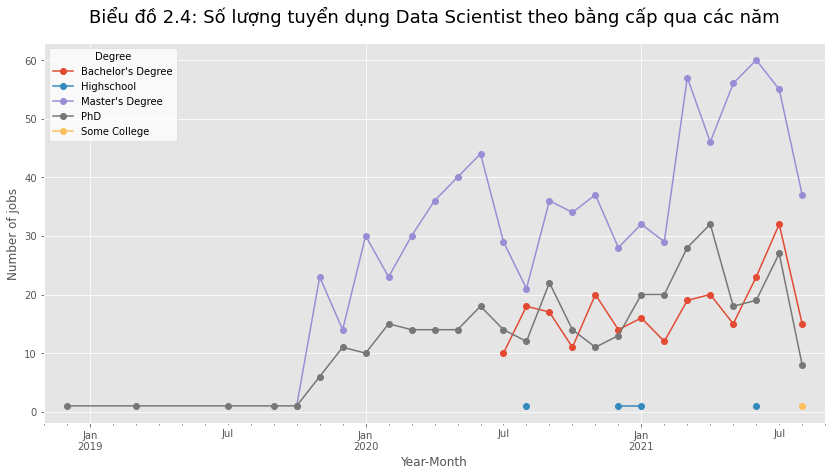

In [30]:
df.plot.line(marker='o', figsize=(14, 7))
plt.xlabel('Year-Month')
plt.ylabel('Number of jobs')
plt.legend(facecolor='white', title='Degree')
# plt.xlim([df_ds['yearmonth'].min() - 1, df_ds['yearmonth'].max() + 1])
plt.xlim([df.index.min() - 1, df.index.max() + 1])
plt.title('Biểu đồ 2.4: Số lượng tuyển dụng Data Scientist theo bằng cấp qua các năm', fontsize=18, pad=20);

Qua biểu đồ ta thấy số lượng tuyển bằng Master tăng nhanh và rõ rệt so với phần còn lại. PhD và Bachelor thì cũng cao vừa phải giống nhau

#### **Bước 5:** Thu nhập theo bằng cấp thay đổi như thế nào

In [31]:
df = df_ds.groupby(['yearmonth', 'education'])[['totalyearlycompensation']].mean()
df = df.unstack(1)
# df = df.fillna(0)
df.columns = df.columns.droplevel(0)
df.head()

education,Bachelor's Degree,Highschool,Master's Degree,PhD,Some College
yearmonth,,,,,
2018-12,NaN,NaN,NaN,125000.0,NaN
2019-03,NaN,NaN,NaN,332000.0,NaN
2019-07,NaN,NaN,NaN,210000.0,NaN
2019-09,NaN,NaN,NaN,60000.0,NaN
2019-10,NaN,NaN,300000.0,306000.0,NaN


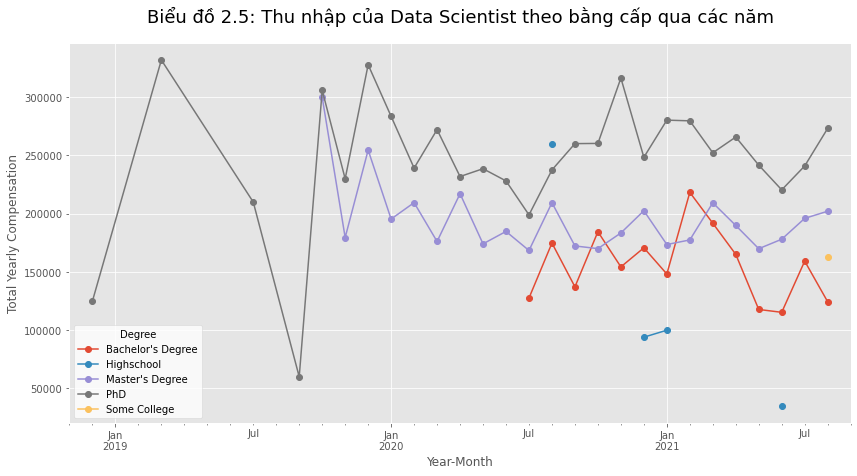

In [32]:
df.plot.line(marker='o', figsize=(14, 7))
plt.xlabel('Year-Month')
plt.ylabel('Total Yearly Compensation')
plt.legend(facecolor='white', title='Degree')
plt.xlim([df.index.min() - 1, df.index.max() + 1])
plt.title('Biểu đồ 2.5: Thu nhập của Data Scientist theo bằng cấp qua các năm', fontsize=18, pad=20);

Qua biểu đồ ta thấy được thu nhập của PhD luôn cao hơn phần còn lại

**Tổng kết câu hỏi**: Qua việc phân tích ta rút ra được một số kết luận:
- Số lượng công việc cho PhD không quá cao (khoảng 5.6%) ít hơn nhiều so với Master và Bachelor nhưng thu nhập của PhD nhìn chung đều cao hơn
- Chỉ những công việc yêu cầu tính học thuật nghiên cứu như Data Scientist, Mechanical Engineer, ... thì số lượng người học lên PhD mới nhiều, và khi đó ta mới cần thiết học thêm lên PhD để tăng giá trị bản thân khi ứng tuyển
- Tuy nhiên ở những vị trí như Marketing, Sales, ...  ít yêu cầu bằng PhD nhưng nếu có cơ hội thì chúng ta nên học lên PhD để có được mức thu nhập cao hơn xứng đáng với giá trị của bằng PhD

### 4.3.

### 4.4. Bằng PhD có giá trị mang lại thu nhập cao ở mọi vị trí hay không?

Trả lời được câu hỏi này sẽ giúp những người đang đang học lên PhD có thêm thông tin về thị trường tuyển dụng, hoặc những người phân vân có nên học lên PhD để có thu nhập cao hơn hay không. Liệu rằng những người có bằng PhD thì thu nhập có cao hơn đáng kể các bằng cấp còn lại hay không và có phải nhất thiết mọi người ở mọi vị trí phải học lên PhD hay không.

Để trả lời câu hỏi này, nhóm tiếp cận theo các bước sau:
- **Bước 1:** Tính tỉ lệ công việc theo bằng cấp. Vẽ biểu đồ tròn
- **Bước 2:** Thu nhập trung bình theo bằng cấp là bao nhiêu, phân bố như thế nào. Vẽ biểu đồ để có cái nhìn tổng quan.
- **Bước 3:** Tính tỉ lệ phần trăm người có các loại bằng cấp ở mỗi vị trí. Vẽ biểu đồ và quan sát xem những vị trí nào có nhiều bằng PhD, những vị trí nào có ít bằng PhD
- **Bước 4:** Chọn ra top 5 vị trí có tỉ lệ bằng PhD cao nhất, so sánh thu nhập trung bình theo bằng cấp để xem liệu lương PhD có lệch nhiều so với các bằng khác hay không
- **Bước 5:** Tương tự ý 3. nhưng với top 5 vị trí có bằng PhD thấp nhât

Đầu tiên, trước khi phân tích, tiến hành loại bỏ đi các dòng mà cột `education` có giá trị NaN, lưu kết quả vào biến df để dùng cho các phân tích phía sau

In [33]:
df = salary_df[salary_df['education'].notna()]

#### **Bước 1:** Tỉ lệ công việc theo bằng cấp

In [34]:
df.education.value_counts(normalize=True) * 100

Master's Degree      50.678301
Bachelor's Degree    41.491604
PhD                   5.607507
Some College          1.168917
Highschool            1.053671
Name: education, dtype: float64

Vẽ biểu đồ tròn thể hiện tỉ lệ phần trăm công việc theo bằng cấp

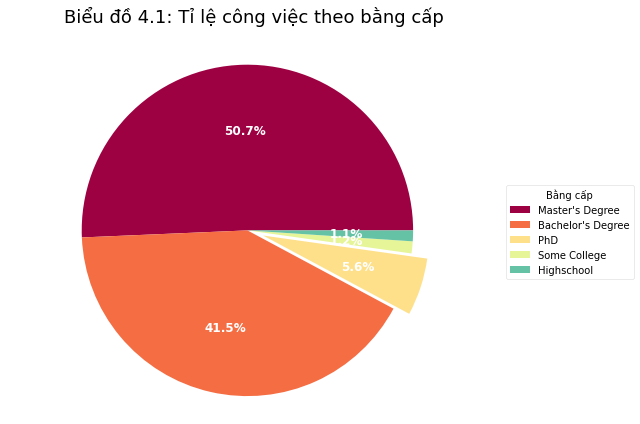

In [35]:
plot_pie_chart(
    df.education.value_counts().values,
    df.education.value_counts().index,
    plot_title="Biểu đồ 4.1: Tỉ lệ công việc theo bằng cấp",
    legend_title="Bằng cấp",
    explode=[0, 0, 0.1, 0, 0],
    random_num=1
)

Ta thấy công việc dành cho PhD chiếm tỉ lệ không quá cao, chỉ chiếm 5.6%

#### **Bước 2:** Thu nhập trung bình theo bằng cấp là bao nhiêu, phân bố như thế nào.

Gom dữ liệu theo cột `education` và `totalyearlycompensation`, tính giá trị trung bình và độ lệch chuẩn, sau đó sắp theo thứ tự giá trị trung bình giảm dần

In [36]:
df_compen_by_edu = df[['education', 'totalyearlycompensation']].groupby('education').agg(['mean', 'std'])
df_compen_by_edu = df_compen_by_edu.sort_values(('totalyearlycompensation', 'mean'), ascending=False)
df_compen_by_edu

totalyearlycompensation               
                                     mean            std
education                                               
PhD                         291865.531415  150201.764434
Master's Degree             220731.076603  138376.175034
Some College                210121.126761  129397.405989
Highschool                  187731.250000  121207.623723
Bachelor's Degree           177845.409095  117969.030391

Vẽ biểu đồ cột thể hiện giá trị trung bình và có biểu diễn độ lệch chuẩn để thể hiện sự dao động của mức thu nhập

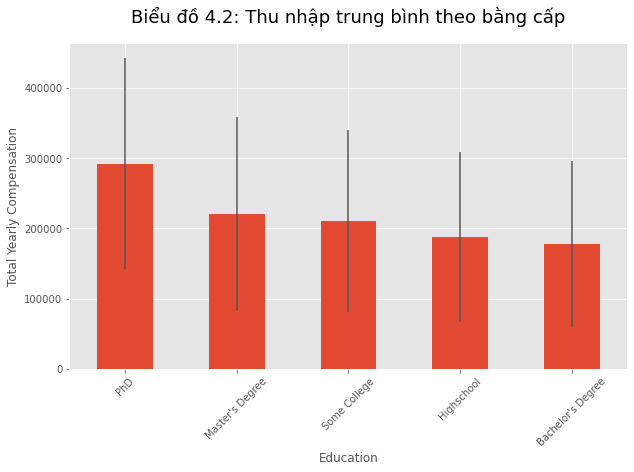

In [37]:
df_compen_by_edu[('totalyearlycompensation', 'mean')].plot.bar(figsize=(10, 6), yerr=df_compen_by_edu[('totalyearlycompensation', 'std')])
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Total Yearly Compensation')
plt.title('Biểu đồ 4.2: Thu nhập trung bình theo bằng cấp', fontsize=18, pad=20);

Vẽ thêm biểu đồ boxplot thể hiện sự phân bố mức thu nhập theo bằng cấp

Text(0.5, 1.0, 'Biểu đồ 4.3: Phân bố thu nhập hằng năm theo bằng cấp')

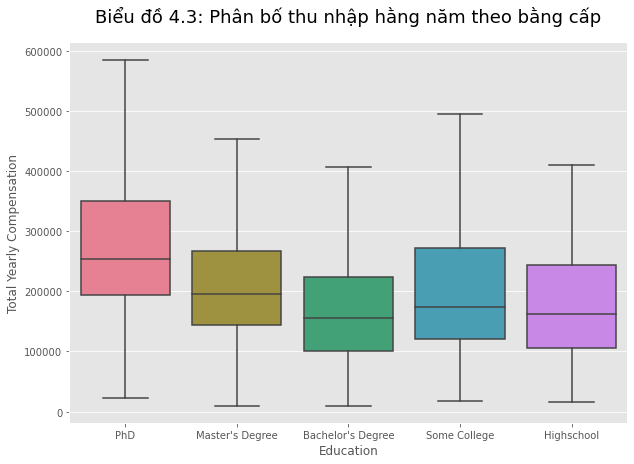

In [38]:
# sns.color_palette("Set2")
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='education', y='totalyearlycompensation', showfliers=False, palette=sns.color_palette("husl", 5))
plt.xlabel('Education')
plt.ylabel('Total Yearly Compensation')
plt.title('Biểu đồ 4.3: Phân bố thu nhập hằng năm theo bằng cấp', fontsize=18, pad=20)

Tới đây ta có vài nhận xét ban đầu:
- Số lượng công việc cho PhD chiếm tỉ lệ không quá cao, chỉ đứng thứ 3 sau Master và Bachelor
- Tuy số lượng công việc không quá cao nhưng thu nhập của người có bằng PhD nhìn chung là cao hơn so với các bằng cấp còn lại dù cũng có dao động nhiều

#### **Bước 3:** Tính tỉ lệ phần trăm người có các loại bằng cấp ở mỗi vị trí

Gom nhóm dữ liệu theo `title`, `education` và đếm số lượng dòng (người). Kết quả thu được là một series có index dạng multi-level, dùng lệnh unstack để chuyển về dataframe với 2 chiều là title và education

In [39]:
df_tmp = df.groupby(['title', 'education']).size()
df_tmp = df_tmp.unstack().fillna(0)
df_tmp

education,Bachelor's Degree,Highschool,Master's Degree,PhD,Some College
title,,,,,
Business Analyst,276.0,0.0,237.0,5.0,3.0
Data Scientist,242.0,4.0,798.0,365.0,1.0
Hardware Engineer,222.0,1.0,840.0,217.0,2.0
Human Resources,89.0,2.0,99.0,7.0,2.0
Management Consultant,252.0,0.0,333.0,12.0,4.0
Marketing,226.0,7.0,182.0,4.0,4.0
Mechanical Engineer,159.0,0.0,130.0,27.0,4.0
Product Designer,386.0,19.0,342.0,20.0,14.0
Product Manager,669.0,13.0,1462.0,35.0,18.0


Duyệt qua từng cột, tính tỉ lệ phần trăm số người có bằng và vị trí công việc tương ứng. Sau đó sắp xếp theo tỉ lệ số người có bằng PhD giảm dần

In [40]:
df_percentage = df_tmp.apply(lambda col: col*100/df_tmp.sum(axis=1))
df_percentage = df_percentage.sort_values('PhD', ascending=False)
# selected_phd_title = df_percentage.index[[0, 1, 2, -3, -2, -1]]
df_percentage = df_percentage[["PhD", "Master's Degree", "Bachelor's Degree", "Some College", "Highschool"]]
# df_percentage = df_percentage[["PhD", "Bachelor's Degree", "Some College", "Highschool", "Master's Degree"]]
df_percentage

education,PhD,Master's Degree,Bachelor's Degree,Some College,Highschool
title,,,,,
Data Scientist,25.886525,56.595745,17.163121,0.070922,0.283688
Hardware Engineer,16.926677,65.522621,17.316693,0.156006,0.078003
Mechanical Engineer,8.437500,40.625000,49.687500,1.250000,0.000000
Software Engineering Manager,5.307995,56.487549,34.927916,2.162516,1.114024
Software Engineer,4.615945,47.944421,45.071815,1.212531,1.155287
Human Resources,3.517588,49.748744,44.723618,1.005025,1.005025
Technical Program Manager,3.218117,56.257449,37.187128,2.026222,1.311085
Product Designer,2.560819,43.790013,49.423816,1.792574,2.432778
Solution Architect,2.367942,51.366120,42.622951,1.092896,2.550091


Vẽ biểu đồ cột chồng để thể hiện rõ hơn

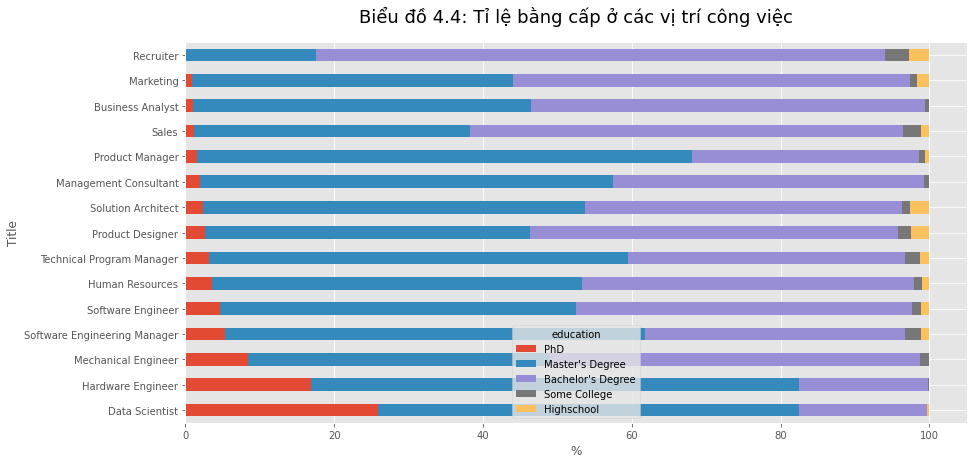

In [41]:
df_percentage.plot(kind='barh', stacked=True, figsize=(14, 7))
plt.xlabel('%')
plt.ylabel('Title')
plt.title('Biểu đồ 4.4: Tỉ lệ bằng cấp ở các vị trí công việc', fontsize=18, pad=20);

Ta thấy có sự thay đổi rõ rệt về tỉ lệ người có bằng PhD ở các công việc:
- Những công việc đòi hỏi có sự nghiên cứu, đọc paper như Data Scientist, Hardware Engineer, Mechanical Engineer thì tỉ lệ người có bằng PhD cao là điều dễ hiểu, bên cạnh đó thì tỉ lệ bằng Master cũng khá cao.
- Tiếp theo là những vị trí như Software Engineering Manager, Software Engineer (SE) cũng có tỉ lệ PhD tương đối cao. Đối với SE thông thường về mảng Web hay Mobile thì thường bằng cấp cao không cần thiết lắm vì cũng ít mang nặng tính học thuật, nhưng trong dữ liệu này có thể vì gộp cả AI/ML Engineer vào chung nhóm SE nên đã đẩy tỉ lệ PhD của nhóm SE lên.
- Ở những công việc như Recruiter, Marketing, Sales thì có vẻ đòi hỏi kĩ năng làm việc với con người nhiều hơn là học thuật nên tỉ lệ người có bằng PhD khá thấp, phần lớn là Master và Bachelor

#### **Bước 5:** So sánh thu nhập trung bình theo bằng cấp của top 5 vị trí có tỉ lệ PhD thấp nhất

Lấy ra top 5 vị trí công việc có tỉ lệ PhD cao nhất

In [42]:
df_percentage = df_percentage.sort_values('PhD', ascending=False)
top_phd_title = df_percentage.index[:5].values
print(top_phd_title)

['Data Scientist' 'Hardware Engineer' 'Mechanical Engineer'
 'Software Engineering Manager' 'Software Engineer']


Lọc ra 5 vị trí theo danh sách thu được, gom nhóm theo `title`, `totalyearlycompensation` và tính mức thu nhập trung binh

In [43]:
df_temp = df[df.title.isin(top_phd_title)]
df_by_title_edu = df_temp.groupby(['title', 'education'])[['totalyearlycompensation']].mean()
df_by_title_edu

totalyearlycompensation
title                        education                                 
Data Scientist               Bachelor's Degree            155314.049587
                             Highschool                   122250.000000
                             Master's Degree              188525.062657
                             PhD                          253901.369863
                             Some College                 163000.000000
Hardware Engineer            Bachelor's Degree            178400.900901
                             Highschool                   270000.000000
                             Master's Degree              202908.333333
                             PhD                          251599.078341
                             Some College                 135000.000000
Mechanical Engineer          Bachelor's Degree            139616.352201
                             Master's Degree              167576.923077
                             PhD                          220666.666667
                             Some College                  64250.000000
Software Engineer            Bachelor's Degree            169140.399492
                             Highschool                   173472.972973
                             Master's Degree              210244.545751
                             PhD                          306023.675310
                             Some College                 202957.081545
Software Engineering Manager Bachelor's Degree            295733.583490
                             Highschool                   319235.294118
                             Master's Degree              357475.638051
                             PhD                          453617.283951
                             Some College                 349333.333333

Unstack để chuyển từ dataframe có multi-level index có dạng ốm cao sang dạng cân đối dễ nhìn hơn. Có những vị trí như Hardware Engineer không có dòng nào có bằng Highschool nên kết quả sẽ ra NaN, ta thay thế bằng giá trị 0.

In [44]:
df_top_phd_compen = df_by_title_edu.unstack()
# df_top_phd_compen.columns = df_top_phd_compen.columns.droplevel(0)
df_top_phd_compen.fillna(0, inplace=True)
df_top_phd_compen

totalyearlycompensation                 \
education                          Bachelor's Degree     Highschool   
title                                                                 
Data Scientist                         155314.049587  122250.000000   
Hardware Engineer                      178400.900901  270000.000000   
Mechanical Engineer                    139616.352201       0.000000   
Software Engineer                      169140.399492  173472.972973   
Software Engineering Manager           295733.583490  319235.294118   

                                                                            
education                    Master's Degree            PhD   Some College  
title                                                                       
Data Scientist                 188525.062657  253901.369863  163000.000000  
Hardware Engineer              202908.333333  251599.078341  135000.000000  
Mechanical Engineer            167576.923077  220666.666667   64250.000000  
Software Engineer              210244.545751  306023.675310  202957.081545  
Software Engineering Manager   357475.638051  453617.283951  349333.333333

Vẽ biểu đồ để so sánh

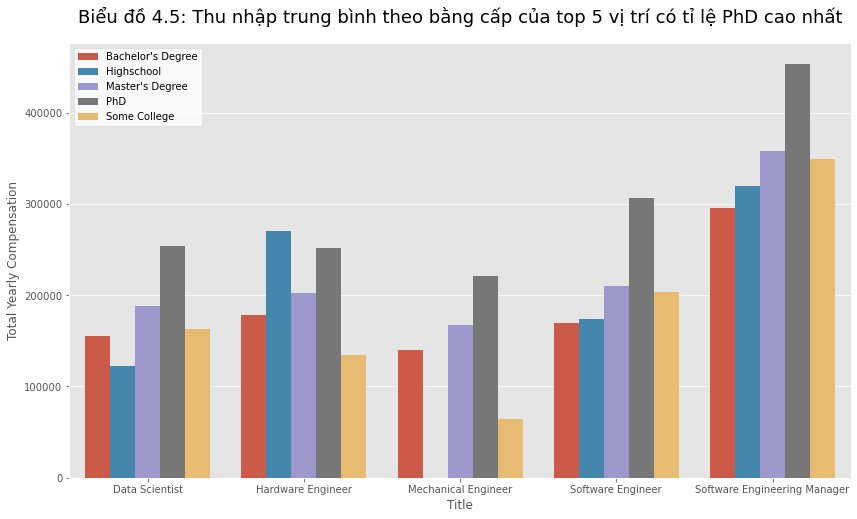

In [45]:
# lệnh reset_index chỉ để tạo ra dataframe có dạng thuận tiện cho việc vẽ biểu đồ
df_by_title_edu = df_by_title_edu.reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x="title", y="totalyearlycompensation", hue="education", data=df_by_title_edu, ci=None)
plt.legend(facecolor='white')
plt.xlabel('Title')
plt.ylabel('Total Yearly Compensation')
plt.title('Biểu đồ 4.5: Thu nhập trung bình theo bằng cấp của top 5 vị trí có tỉ lệ PhD cao nhất', fontsize=18, pad=20);

Qua biểu đồ ta thấy rằng với những công việc có tỉ lệ PhD cao thì thu nhập cho PhD cao hơn khá rõ so với các bằng khác, khá xứng đáng với giá trị của bằng PhD

Tuy nhiên, ở vị trí Hardware Engineer có dấu hiệu bất thường là cột thu nhập trung bình của Highschool cao bất thường vượt qua cả PhD. Ta tiến hành kiểm tra điều này thì thấy rằng chỉ có một dòng duy nhất có title là 'Hardware Engineer' và education là 'Highschool', nhiều khả năng đây là giá trị nhiễu do quá trình nhập liệu bị nhầm lẫn

In [46]:
df[(df.title=='Hardware Engineer') & (df.education=='Highschool')][['totalyearlycompensation']]

,totalyearlycompensation
49857,270000


#### **Bước 5:** So sánh thu nhập trung bình theo bằng cấp của top 5 vị trí có tỉ lệ PhD thấp nhất

Bước này khá tương tự bước 4 nên nhóm sẽ không giải thích chi tiết từng đoạn code nữa mà chỉ tập trung vào kết quả

In [47]:
df_percentage = df_percentage.sort_values('PhD', ascending=True)
top_phd_title = df_percentage.index[:5].values

df_temp = df[df.title.isin(top_phd_title)]
df_by_title_edu = df_temp.groupby(['title', 'education'])[['totalyearlycompensation']].mean()
df_top_phd_compen = df_by_title_edu.unstack()
df_top_phd_compen.fillna(0, inplace=True)
# df_top_phd_compen.columns = df_top_phd_compen.columns.droplevel(0)
df_top_phd_compen

totalyearlycompensation                                 \
education              Bachelor's Degree     Highschool Master's Degree   
title                                                                     
Business Analyst           121210.144928       0.000000   132223.628692   
Marketing                  173070.796460  149000.000000   231631.868132   
Product Manager            219029.895366  219000.000000   261599.179207   
Recruiter                  157340.314136  193142.857143   149045.454545   
Sales                      198711.409396  126666.666667   216989.473684   

                                           
education              PhD   Some College  
title                                      
Business Analyst  217000.0   87000.000000  
Marketing         322500.0  152000.000000  
Product Manager   349200.0  196666.666667  
Recruiter              0.0  140000.000000  
Sales             281000.0  155500.000000

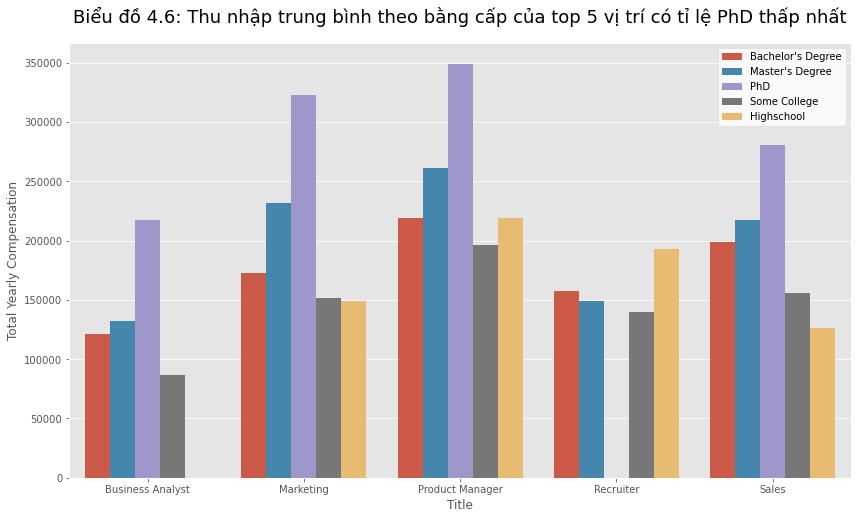

In [48]:
# lệnh reset_index chỉ để tạo ra dataframe có dạng thuận tiện cho việc vẽ biểu đồ
df_by_title_edu = df_by_title_edu.reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x="title", y="totalyearlycompensation", hue="education", data=df_by_title_edu, ci=None)
plt.legend(facecolor='white')
plt.xlabel('Title')
plt.ylabel('Total Yearly Compensation')
plt.title('Biểu đồ 4.6: Thu nhập trung bình theo bằng cấp của top 5 vị trí có tỉ lệ PhD thấp nhất', fontsize=18, pad=20);

Qua biểu đồ ta thấy rằng dù ở những công việc ít yêu cầu nghiên cứu học thuật và có ít người có bằng PhD, tuy nhiên thì những người có bằng PhD đó lại có lương cao hơn khá nhiều so với các bằng còn lại

**Tổng kết câu hỏi**: Qua việc phân tích ta rút ra được một số kết luận:
- Số lượng công việc cho PhD không quá cao (khoảng 5.6%) ít hơn nhiều so với Master và Bachelor nhưng thu nhập của PhD nhìn chung đều cao hơn
- Chỉ những công việc yêu cầu tính học thuật nghiên cứu như Data Scientist, Mechanical Engineer, ... thì số lượng người học lên PhD mới nhiều, và khi đó ta mới cần thiết học thêm lên PhD để tăng giá trị bản thân khi ứng tuyển
- Tuy nhiên ở những vị trí như Marketing, Sales, ...  ít yêu cầu bằng PhD nhưng nếu có cơ hội thì chúng ta nên học lên PhD để có được mức thu nhập cao hơn xứng đáng với giá trị của bằng PhD

## 5. Nhìn lại quá trình làm đồ án

#### Thành viên: Nguyễn Tấn Thìn

##### Những khó khăn:
- Quá trình tìm kiếm và lựa chọn tập dữ liệu ưng ý thực sự mất nhiều thời gian và công sức. Có nhiều ý tưởng mình dự định làm nhưng không kiếm được dữ liệu phù hợp và đầy đủ thì cũng không thể thực hiện được. Hơn nữa, khi mình chọn một chủ đề thì cũng có nhiều tập dữ liệu tương tự trong chủ đề đó, mỗi cái lại được lợi cái này nhưng lại mất cái kia nên cũng phải cân đo đong đếm nhiều để chọn được tập dữ liệu cuối cùng
- Việc nghĩ ra một câu hỏi hay và trả lời được yêu cầu việc suy nghĩ và thử nghiệm khá nhiều lần. Có những ý tưởng câu hỏi hay nhưng lại không khả thi với khả năng của mình.
- Dữ liệu cũng có khá nhiều giá trị thiếu và có cả giá trị sai nên việc xử lý cũng cần cẩn thận


##### Những điều học được:
- Kiên trì và suy nghĩ kĩ trong quá trình lựa chọn tập dữ liệu
- Tỉnh táo và cẩn thận trong quá trình phân tích
- Thành thạo hơn những công cụ phân tích và trực quan hoá dữ liệu

#### Thành viên: Phạm Nguyên Minh Thy

##### Những khó khăn:
- Tập dữ liệu có khá nhiều cột nên ban đầu cũng khó khăn trong việc lựa chọn những cột nào để tiến hành phân tích, đặt câu hỏi và trả lời
- Khi thực hiện phân tích trả lời câu hỏi thì cũng có nhiều trường hợp mình kết quả không tốt được như mong đợi của mình


##### Những điều học được:
- Rèn luyện kĩ năng tư duy, đưa ra từng bước để phân tích, giải quyết một câu hỏi
- Nắm vững hơn các thư viện như pandas cho biến đổi dataframe, matplotlib, seaborn cho vẽ biểu đồ trực quan

#### Cả nhóm: Nếu có thời gian thì sẽ tiến hành:
- Xử lý các giá trị thiếu, nhiễu kĩ càng hơn
- Phân tích thêm cột grantstockvalue hay yearsatcompany
- Hoàn chỉnh hơn việc phân tích các câu trong bài làm